1. Load the dataset

In [3]:
import sys
!{sys.executable} -m pip install scikit-learn



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv ('ecommerce_dataset.csv')
df.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CID                    55000 non-null  int64  
 1   TID                    55000 non-null  int64  
 2   Gender                 55000 non-null  object 
 3   Age Group              55000 non-null  object 
 4   Purchase Date          55000 non-null  object 
 5   Product Category       55000 non-null  object 
 6   Discount Availed       55000 non-null  object 
 7   Discount Name          27415 non-null  object 
 8   Discount Amount (INR)  55000 non-null  float64
 9   Gross Amount           55000 non-null  float64
 10  Net Amount             55000 non-null  float64
 11  Purchase Method        55000 non-null  object 
 12  Location               55000 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 5.5+ MB


2. Data cleaning & Preprocessing

In [7]:
# check for missing values
df.isnull().sum()

CID                          0
TID                          0
Gender                       0
Age Group                    0
Purchase Date                0
Product Category             0
Discount Availed             0
Discount Name            27585
Discount Amount (INR)        0
Gross Amount                 0
Net Amount                   0
Purchase Method              0
Location                     0
dtype: int64

In [8]:
# fill or remove missing values
df['Discount Name'].fillna(value=pd.NA, inplace=True)
df.head()

/var/folders/pz/x922ffzx1z77z1strd8qk2qh0000gn/T/ipykernel_63954/1397362327.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Discount Name'].fillna(value=pd.NA, inplace=True)


,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,<NA>,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


3. Exploratory Data Analysis (EDA)

3.1 Age group distribution

In [9]:
# Define the correct order
age_order = ["under 18","18-25", "25-45", "45-60", "60 and above"]

# Convert the 'Age Group' column to a categorical type with the specified order
df['Age Group'] = pd.Categorical(df['Age Group'], categories=age_order, ordered=True)

# Sort the DataFrame by the defined order
df = df.sort_values(by="Age Group")

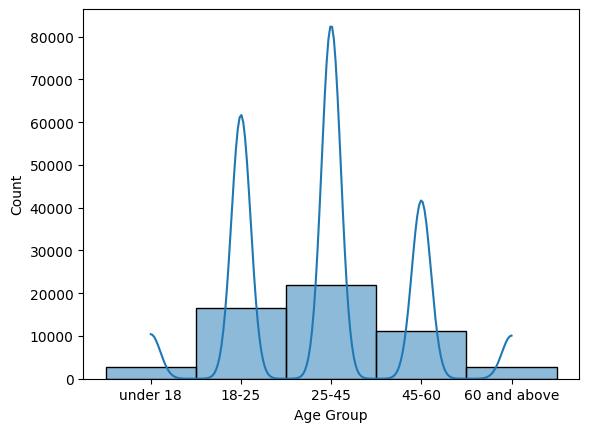

In [10]:
sns.histplot(df, x="Age Group", kde=True, discrete=True)
# plt.xticks(rotation=45)  # Rotate labels if necessary
plt.show()

3.2 Revenue Trend over time

In [11]:
# convert purchase date to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

/var/folders/pz/x922ffzx1z77z1strd8qk2qh0000gn/T/ipykernel_63954/3418042911.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])


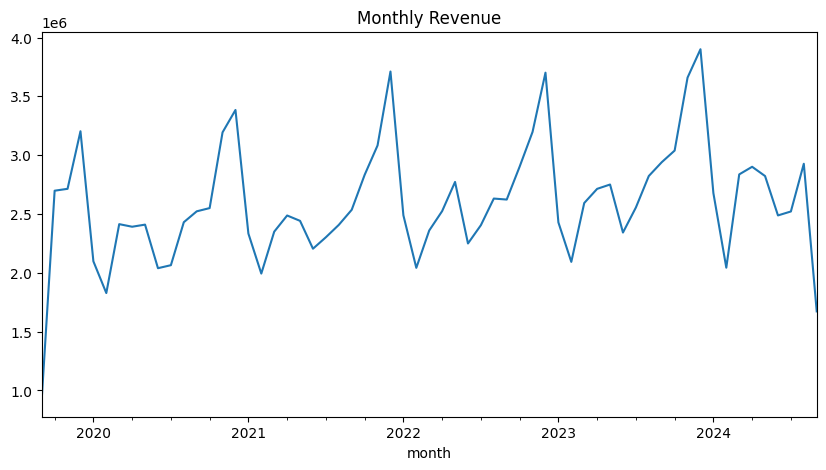

In [12]:
# df.head()
df['month'] = df['Purchase Date'].dt.to_period('M')
revenue_trend = df.groupby('month')['Net Amount'].sum()
revenue_trend.plot(kind='line', figsize=(10,5), title="Monthly Revenue")
plt.show()

3.3 Customers behavior

In [13]:
# Top customers
top_customers = df.groupby('CID')['Net Amount'].sum().sort_values(ascending=False).head(10)
print(top_customers)

CID
308795    27966.338575
838253    27960.864050
938373    27948.780325
551839    27646.756075
949541    27120.619750
700005    26495.393450
583020    26183.231350
949729    25866.166700
698782    25661.707900
251857    25551.689175
Name: Net Amount, dtype: float64


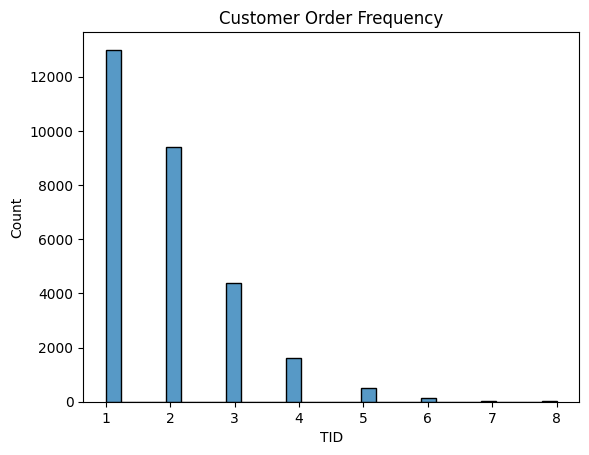

In [14]:
# Repeated purchases
repeat_customers = df.groupby('CID')['TID'].count()
sns.histplot(repeat_customers, bins=30)
plt.title("Customer Order Frequency")
plt.show()


3.4 Customer Retention

In [15]:
# create labels for the 1st purchase
df['cohort_month'] = df.groupby('CID')['Purchase Date'].transform('min').dt.to_period('M')

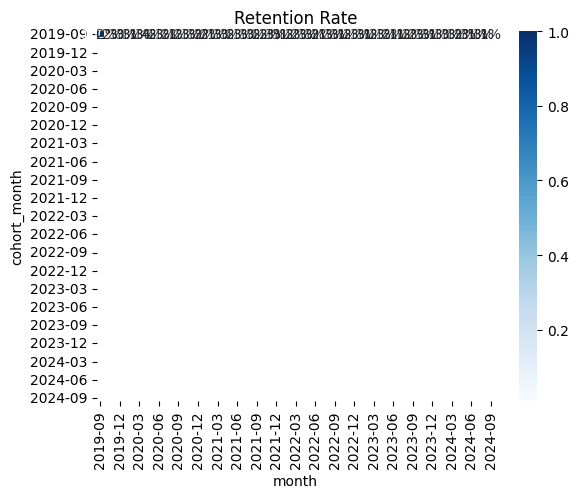

In [16]:
# calculate retentioin rate
cohort_counts = df.groupby(['cohort_month', 'month'])['CID'].nunique().unstack()
retention_rate = cohort_counts.divide(cohort_counts.iloc[:, 0], axis=0)
sns.heatmap(retention_rate, cmap="Blues", annot=True, fmt=".0%")
plt.title("Retention Rate")
plt.show()


3.5 Recency, Frequency, and Monetary Value

In [17]:
from datetime import datetime
snapshot_date = df['Purchase Date'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CID').agg({
    'Purchase Date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'CID': 'count',  # Frequency
    'Net Amount': 'sum'  # Monetary
}).rename(columns={'Purchase Date': 'Recency', 'CID': 'Frequency', 'Net Amount': 'Monetary'})
print(rfm.head())


        Recency  Frequency    Monetary
CID                                   
100009      288          1   6310.8184
100037      877          1   3147.9920
100063     1630          1    522.9000
100089      262          4  12130.3720
100096       19          1   4320.6750


In [18]:
import sklearn
print(sklearn.__version__)


1.6.1


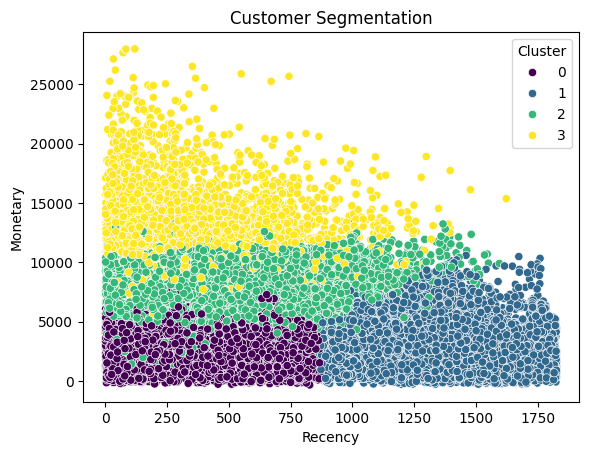

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

sns.scatterplot(x=rfm['Recency'], y=rfm['Monetary'], hue=rfm['Cluster'], palette='viridis')
plt.title("Customer Segmentation")
plt.show()
